IMPORT MODULES

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats
import random

CONSTANTS

In [10]:
global H_0, m_0, c
m_0 = -20.45
c = 299792458 # m/s
H_0 = 70*10**-3 #m s^-1 pc^-1

READ DATA

In [11]:
#reads data and saves it into relevantly named variables.
data = functions.read_data('sn_data_extended.txt')
name, redshift, distance_modulus, dm_err = data[0], data[1], data[2], data[3]

Calculate Density Parameters with no restriction on Universe geometry - automated chi-squared fitting

DoF = 578
Optimised parameters =  [0.72335839 0.2785277 ] 

Covariance matrix = 
 [[0.00670455 0.0047846 ]
 [0.0047846  0.00393854]]


c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:105: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,
c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:110: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xval,


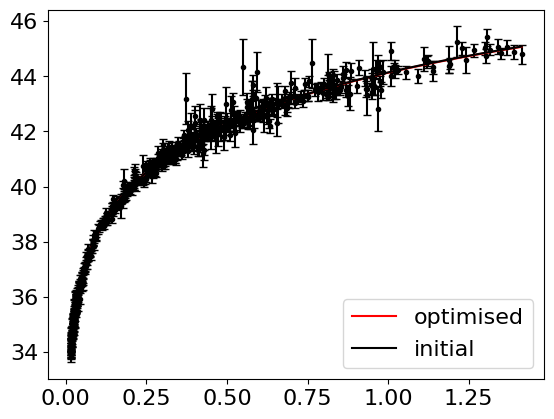

chi^2_min = 562.2265014400585
reduced chi^2 = 0.9727102101039075
$P(chi^2_min, DoF)$ = 0.6731256805812623


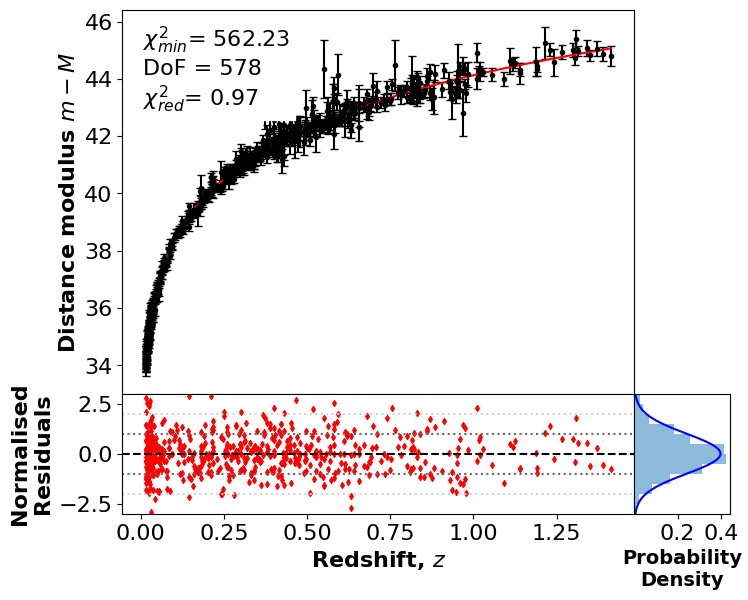

optimised parameter[0] = 0.723358386409343 +/- 0.08188132421468117
optimised parameter[1] = 0.2785277011283405 +/- 0.06275779656676274
omega_TOT = 1.0018860875376836 +/- 0.10316536378584097


In [5]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) #optimised parameters given in erg/s/Ang
#prints the total density parameter to check how close it is to 1 (flat universe).
print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0]), np.sqrt(np.sum(parameters[1]**2))))

3 parameter fitting

In [6]:
#chi squared fitting

"""xval = redshift
yval = distance_modulus
yerr = dm_err

plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

def model_funct(xs, *vals):
    try:
        if k==0:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]
        else:
            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]
    except:
        if k==0:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])
        else:
            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])

    if k == 0:
        return 5*np.log10((1+xs)*r_c)-5
    elif k == 1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c)/R_0))-5
    elif k == -1:
        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5
        return 5*np.log10((1+xs)*R_0*np.sinh(np.array(r_c)/R_0))-5

initials = [np.array([0.02, 0.3, 0.075]), np.array([0.05, 0.075]), np.array([1.5, 0.51, 0.075])] # Initial guess for fit parameters
ks = [-1, 0, 1]

for i in range(0, len(ks)):
    k = ks[i]
    print(f'k={k}') 
    initial = initials[i]
    parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$') #optimised parameters given in erg/s/Ang
    if k == 1 or k==-1:
        print('omega_TOT = {} +/- {}'.format(np.sum(parameters[0][0:2]), np.sqrt(np.sum(parameters[1][0:2]**2))))"""

"xval = redshift\nyval = distance_modulus\nyerr = dm_err\n\nplt.rcParams.update({'font.size': 16, 'lines.markersize': 3})\n\ndef model_funct(xs, *vals):\n    try:\n        if k==0:\n            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[1], k, vals[0], 1-vals[0]))[0]) for x in xs.tolist()]\n        else:\n            r_c = [(scipy.integrate.quad(functions.comoving_distance_integrand, 0, x, args=(vals[2], k, vals[0], vals[1]))[0]) for x in xs.tolist()]\n    except:\n        if k==0:\n            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[1], k, vals[0], 1-vals[0]))[0])\n        else:\n            r_c = (scipy.integrate.quad(functions.comoving_distance_integrand, 0, xs, args=(vals[2], k, vals[0], vals[1]))[0])\n\n    if k == 0:\n        return 5*np.log10((1+xs)*r_c)-5\n    elif k == 1:\n        R_0 = ((k*c**2)/(H_0**2*(vals[0] + vals[1] - 1)))**0.5\n        return 5*np.log10((1+xs)*R_0*np.sin(np.array(r_c

Different dark energy models

First fitting w (as a constant) and $\Omega_{\Lambda, 0}$

DoF = 578


c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:239: RuntimeWarning: invalid value encountered in double_scalars
  return ((c)/(H_0**2*(omega_M0*(1+z)**3+omega_lambda0*(1/(1+z))**(-3*(1+w_model)))-(1+z)**2*H_0**2*(omega_lambda0+omega_M0-1))**0.5)
c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:248: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  output.append(scipy.integrate.quad(function, lower_limit_array[i], upper_limit_array[i], args = args)[0])


Optimised parameters =  [ 0.7203629  -1.00448697] 

Covariance matrix = 
 [[0.00403331 0.00903722]
 [0.00903722 0.02115742]]


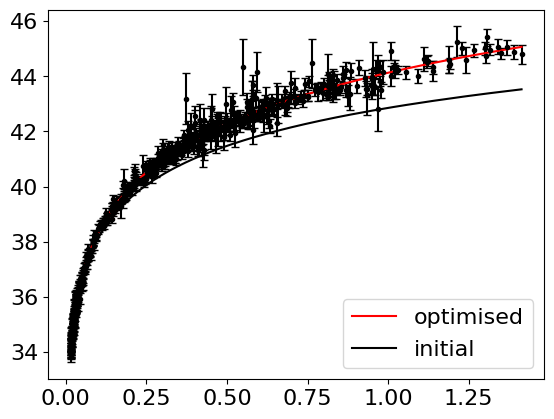

chi^2_min = 562.2257299861153
reduced chi^2 = 0.972708875408504
$P(chi^2_min, DoF)$ = 0.6731340178964063


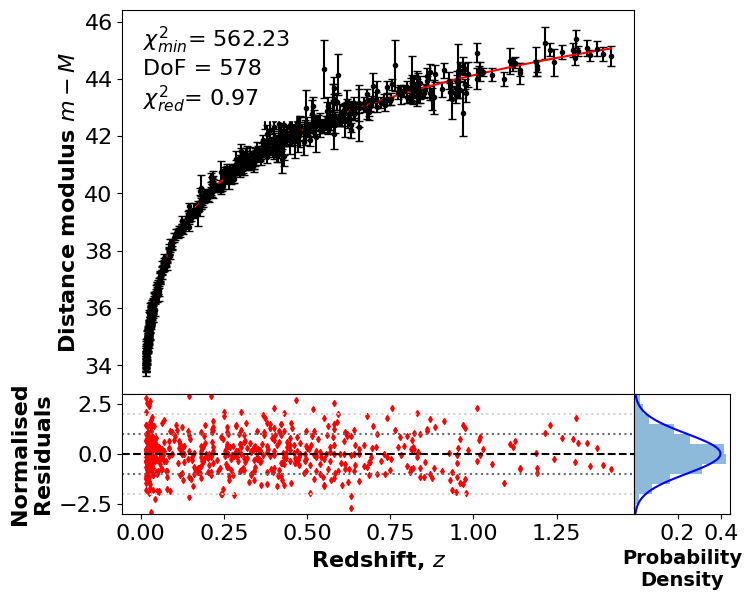

optimised parameter[0] = 0.7203629041155288 +/- 0.06350836233720308
optimised parameter[1] = -1.0044869738914817 +/- 0.145455913920013


In [7]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model=vals[1]))-5

initial = np.array([0.73, 0.8]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

Asymptotic model: $w(z) = w_0 + w_a\frac{z}{1+z}$

DoF = 578
Optimised parameters =  [0.72438695 0.03788847] 

Covariance matrix = 
 [[0.0065882  0.11494756]
 [0.11494756 2.06025786]]


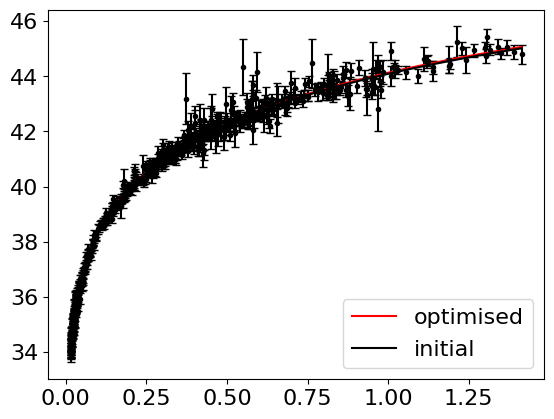

chi^2_min = 562.2259672708985
reduced chi^2 = 0.9727092859358106
$P(chi^2_min, DoF)$ = 0.6731314535028199


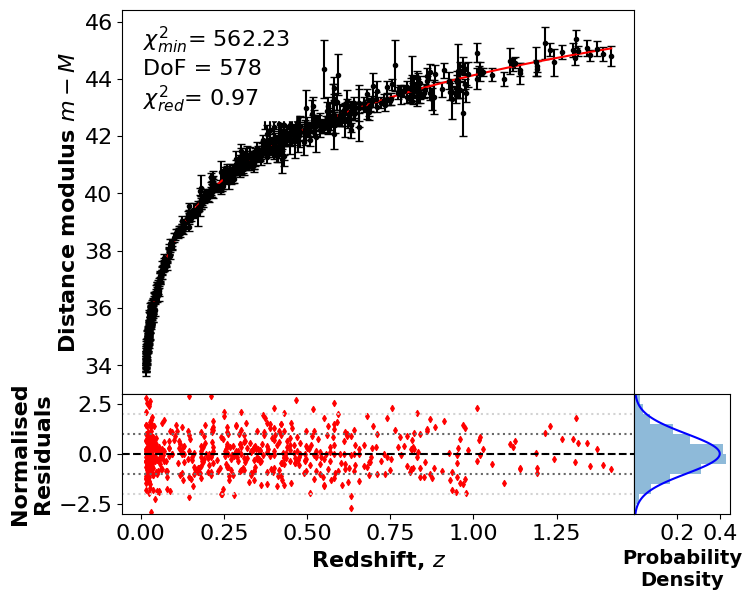

optimised parameter[0] = 0.724386949577371 +/- 0.08116775049833537
optimised parameter[1] = 0.0378884741030205 +/- 1.435359836819749


In [8]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='asymptotic', w_0 = -1, w_a = vals[1]))-5

initial = np.array([0.73, 0.58]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

Fitting all 4 parameters at once $(\Omega_{\Lambda,0}, \Omega_{M, 0}, w_0, w_a)$ for the asymptotic w model

DoF = 576


c:\Users\bradl\.vscode\computing_project\Supernova_Cosmology\functions.py:233: RuntimeWarning: invalid value encountered in double_scalars
  return ((c)/(H_0**2*(omega_M0*(1+z)**3+omega_lambda0*(1/(1+z))**(-3*(1+w_0+w_a))*np.exp(-3*w_a*z/(1+z)))-(1+z)**2*H_0**2*(omega_lambda0+omega_M0-1))**0.5)


Optimised parameters =  [ 0.06895789 -1.58389688  2.68304473 -4.66558469] 

Covariance matrix = 
 [[  0.15132442  -1.10458274  -1.74192262   3.68231833]
 [ -1.10458274   8.1028688   12.65130092 -26.67500201]
 [ -1.74192262  12.65130092  20.16105262 -42.75054219]
 [  3.68231833 -26.67500201 -42.75054219  90.8333073 ]]


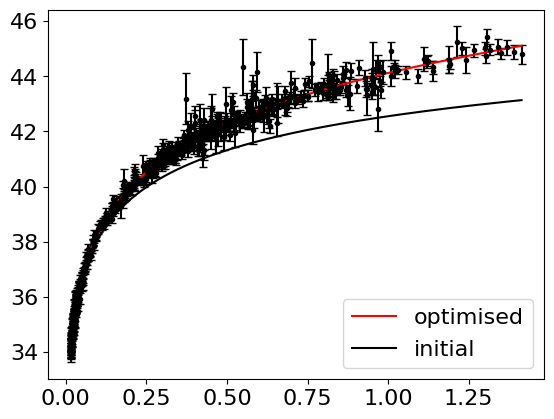

chi^2_min = 561.7397436758035
reduced chi^2 = 0.97524261054827
$P(chi^2_min, DoF)$ = 0.6568865484922026


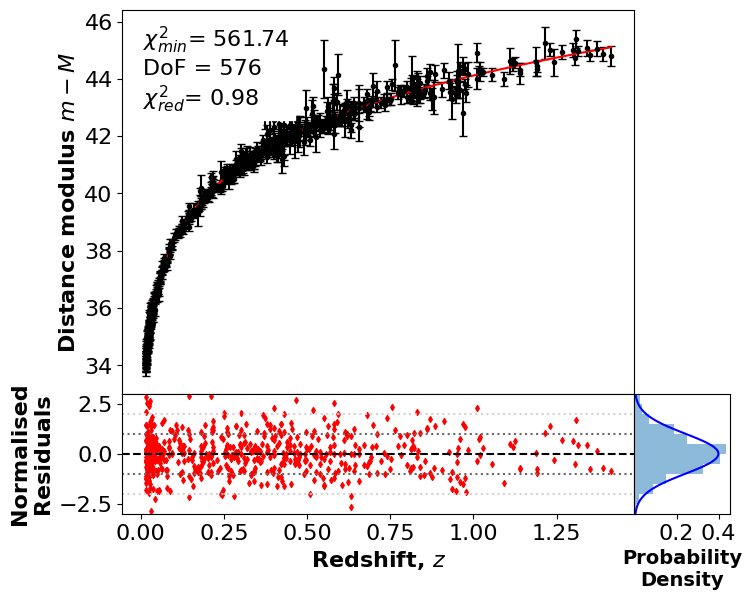

optimised parameter[0] = 0.06895789423850507 +/- 0.3890043958182932
optimised parameter[1] = -1.5838968755148954 +/- 2.8465538464178746
optimised parameter[2] = 2.683044727148142 +/- 4.4901060809805555
optimised parameter[3] = -4.6655846941379355 +/- 9.530650937778981


In [9]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], vals[1], w_model='asymptotic', w_0 = vals[2], w_a = vals[3]))-5

initial = np.array([0.73, 0.27, 1, 1]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

$w(z) = w_0 + w_{z}z$

DoF = 578
Optimised parameters =  [0.72451006 0.01450791] 

Covariance matrix = 
 [[0.0031173  0.01904557]
 [0.01904557 0.12328749]]


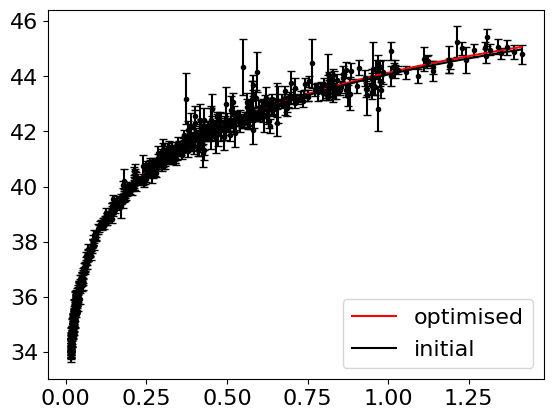

chi^2_min = 562.2249339440802
reduced chi^2 = 0.9727074981731492
$P(chi^2_min, DoF)$ = 0.6731426208592325


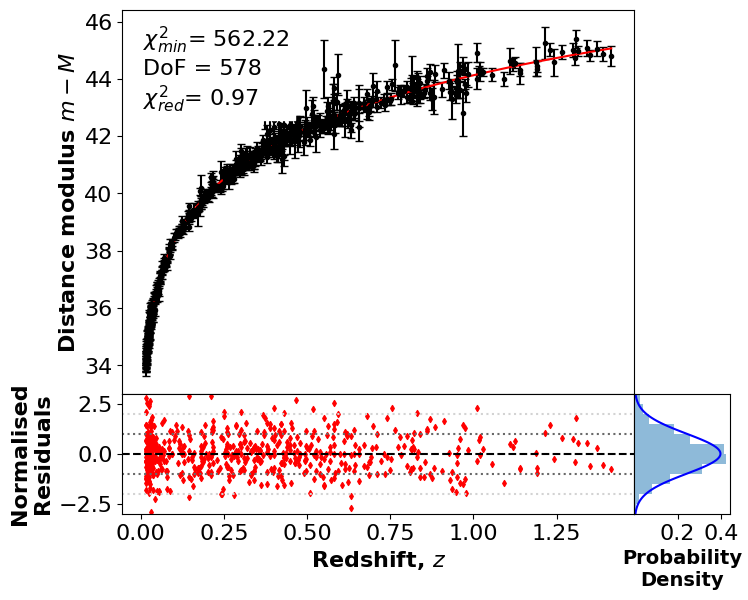

optimised parameter[0] = 0.7245100627056911 +/- 0.05583277006882163
optimised parameter[1] = 0.014507907819879444 +/- 0.35112317805702287


In [10]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='linear', w_0 = -1, w_a = vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

$w(z) = w_0 + w_a\ln(1+z)$ - Logarithmic model

DoF = 578
Optimised parameters =  [0.72491826 0.02098913] 

Covariance matrix = 
 [[0.00489087 0.03731064]
 [0.03731064 0.29520693]]


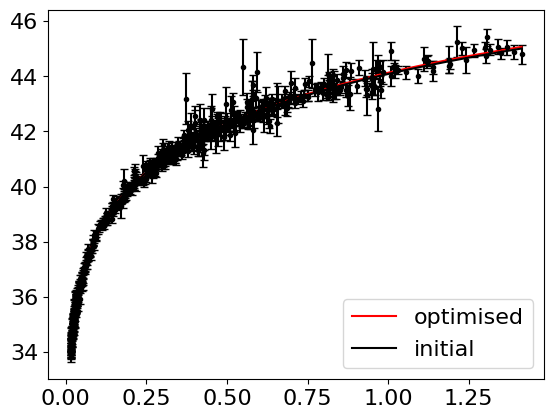

chi^2_min = 562.225255585786
reduced chi^2 = 0.9727080546466886
$P(chi^2_min, DoF)$ = 0.673139144832244


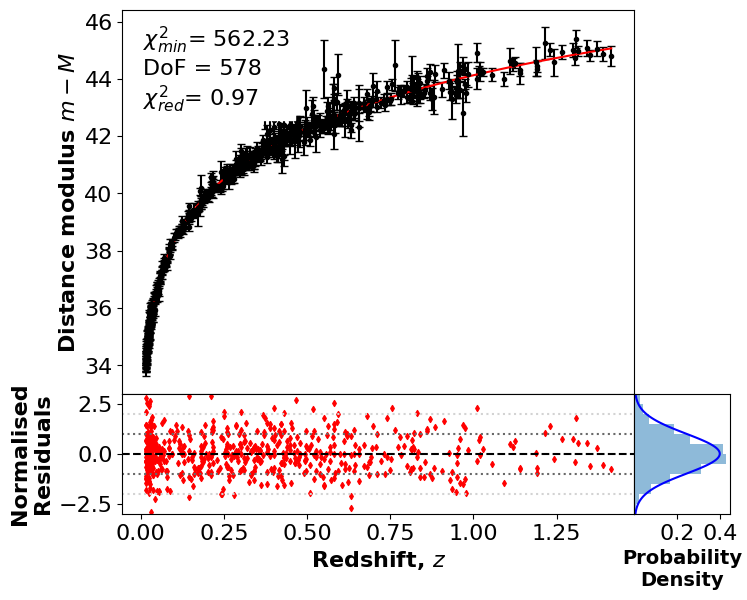

optimised parameter[0] = 0.7249182592568977 +/- 0.06993478728121495
optimised parameter[1] = 0.020989133924862895 +/- 0.543329481248286


In [11]:
#chi squared fitting

#defining x and y values and the y errors for the chi squared fitting.
xval = redshift
yval = distance_modulus
yerr = dm_err

#setting some parameters for the resulting plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 3})

#the model function that we're fitting to the dataset.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='logarithmic', w_0 = -1, w_a = vals[1]))-5

initial = np.array([0.73, 0.27]) # Initial guess for fit parameters

#runs the automated chi squared fitting of the x and y data to the model function above, returning chi-squared statistics and the best fit parameters and their errors.
parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial, 
                                                xlabel = 'Redshift, $z$', 
                                                ylabel = 'Distance modulus $m - M$',
                                                contour_plot=False,
                                                parameter_labels=['$Ω_{Λ,0}$', '$Ω_{M,0}$']) 

Plotting all models on same graph

NameError: name 'L_peak' is not defined

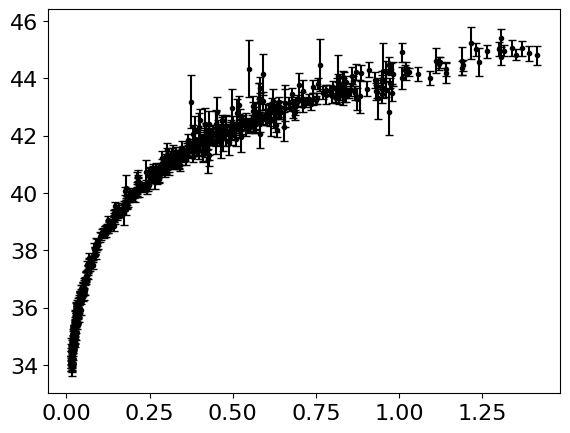

In [12]:
#the model function we are fitting the data to.
def model_funct(xs, *vals):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, vals[0], 1-vals[0], w_model='logarithmic', w_0 = -1, w_a = vals[1]))-5

#top plot - plotting observed data with three lines corresponding to the three different combinations of the density parameters in the model function.
plt.figure(1)
plt.figure(1).add_axes((0,0,0.8,0.8))
plt.errorbar(redshift, distance_modulus, yerr = dm_err, color = 'black', capsize = 3, marker='o', linestyle='None')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), model_funct(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, omega_lambda, 1-omega_lambda), label = f'$Ω_Λ = {np.round(omega_lambda, 2)}, Ω_M = {np.round(1-omega_lambda, 2)}$', color = 'red', linestyle = '--')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), functions.mag_model(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, 1, 0), label = '$Ω_Λ = 1, Ω_M = 0$', color = 'blue', linestyle = '--')
plt.plot(np.linspace(np.min(redshift), np.max(redshift), 1000), functions.mag_model(np.linspace(np.min(redshift), np.max(redshift), 1000), L_peak, H_0, m_0, 0, 1), label = '$Ω_Λ = 0, Ω_M = 1$', color = 'green', linestyle = '--')
plt.ylabel('Effective Peak Magnitude, $m_{eff}$', weight = 'bold', fontsize = 12)
plt.legend()
plt.title('All data')

#bottom left plot - plotting residuals for three different model functions.
plt.figure(1).add_axes((0,-0.25,0.8,0.25))
colours = ['blue', 'green', 'red']
omega_lambdas = [1, 0, omega_lambda]
plt.ylabel("""Normalised
Residuals""", weight = 'bold')
plt.ylim(-3, 3)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = 1, linestyle = ':', color = 'dimgrey'); plt.axhline(y = -1, linestyle = ':', color = 'dimgrey')
plt.axhline(y = 2, linestyle = ':', color = 'lightgrey'); plt.axhline(y = -2, linestyle = ':', color = 'lightgrey')
plt.xlabel('Redshift, $z$', weight = 'bold', fontsize = 12)
for i in range(0, len(colours)):
        norm_residuals = functions.get_norm_residuals([omega_lambdas[i]], model_funct, redshift, eff_peak_mag, mag_err)
        plt.scatter(redshift, norm_residuals, color=colours[i], marker = 'd')

#bottom right plot - plotting normalised residual distribution histogram for each of the three cases, with a Gaussian centred on 0 superimposed on top.
plt.figure(1).add_axes((0.8,-0.25,0.15,0.25))
plt.xticks([0.2,0.4], fontsize = 13)
mu = 0; variance = 1
sigma = math.sqrt(variance)    
y = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(stats.norm.pdf(y, mu, sigma), y, color = 'black')
plt.xlabel("""Probability
Density""", fontsize = 14, weight = 'bold')
plt.gca().set_yticks([])
plt.gca().invert_yaxis()
for i in range(0, len(colours)):
        norm_residuals = functions.get_norm_residuals([omega_lambdas[i]], model_funct, redshift, eff_peak_mag, mag_err)
        plt.hist(norm_residuals, bins=np.arange(-10, 10, 0.5), alpha = [0.5, 0.5, 0.9][i], density = True, orientation = 'horizontal', color = colours[i])
plt.ylim(-3, 3)

Different dataset

0.5043


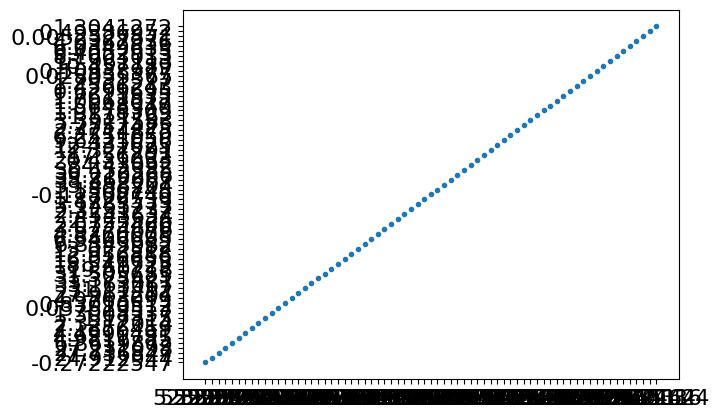

In [13]:
#ascii python reader for table
alldata = np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 26)
redshifts = float(np.loadtxt('jla_light_curves/lc-03D1au.list', dtype = str, comments = '#', skiprows = 3, max_rows=1)[1])
time = alldata[:, 0]
flux = alldata[:, 1]
plt.scatter(time, flux)
print(redshifts)

*_Markov-Chain Monte-Carlo_* - Random Walker

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0.5         0.47      ]
 [ 0.49000001  0.47      ]
 [ 0.5         0.47      ]
 ...
 [ 1.15999937 -0.06999932]
 [ 1.16999936 -0.06999932]
 [ 1.16999936 -0.05999932]]


Text(0.5, 0, 'xval')

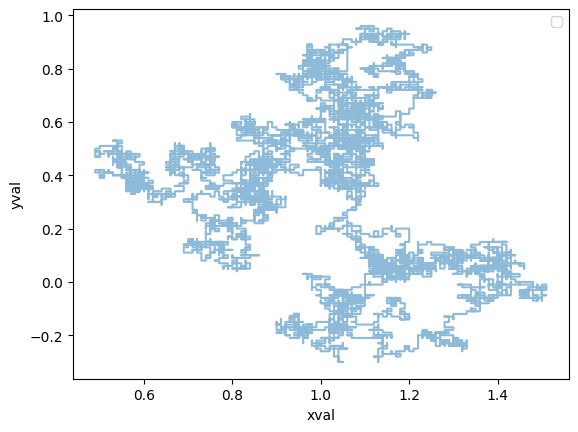

In [12]:
class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=np.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(np.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = np.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=np.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range(0,n):
            positions[i+1] = positions[i]+self.pickStep()
        return np.array(positions, dtype=np.float64)
    
initial_pos = [0.5, 0.47]
w = walker(initial_pos, ndim = 2, step_size=0.01)
no_steps = 100

pos_test = w.doSteps(10000)
print(pos_test)
# plots to help debugging
plt.plot(pos_test[:, 0], pos_test[:, 1], alpha = 0.5)
plt.legend()
plt.ylabel('yval')
plt.xlabel('xval')

Trial data

In [13]:
#test function
def func(x, a, b):
    return a*x+b

#trial data
np.random.seed(123)
xdata = np.arange(0, 51, 1).astype('float64')
ydata = (np.arange(0, 101, 2)+np.random.randint(20, size = 51)*0.01).astype('float64')
yerr = ydata*0.0005


xdata
print(xdata, ydata, yerr)

#a = 2,  b = 0

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.] [  0.13   2.02   4.02   6.06   8.17  10.19  12.1   14.01  16.    18.17
  20.15  22.09  24.    26.14  28.    30.15  32.19  34.14  36.04  38.
  40.16  42.04  44.17  46.03  48.02  50.07  52.02  54.15  56.16  58.07
  60.09  62.03  64.06  66.01  68.02  70.01  72.12  74.08  76.03  78.1
  80.05  82.    84.11  86.02  88.1   90.13  92.18  94.04  96.15  98.11
 100.12] [6.5000e-05 1.0100e-03 2.0100e-03 3.0300e-03 4.0850e-03 5.0950e-03
 6.0500e-03 7.0050e-03 8.0000e-03 9.0850e-03 1.0075e-02 1.1045e-02
 1.2000e-02 1.3070e-02 1.4000e-02 1.5075e-02 1.6095e-02 1.7070e-02
 1.8020e-02 1.9000e-02 2.0080e-02 2.1020e-02 2.2085e-02 2.3015e-02
 2.4010e-02 2.5035e-02 2.6010e-02 2.7075e-02 2.8080e-02 2.9035e-02
 3.0045e-02 3.1015e-02 3.2030e-02 3.3005e-02 3.4010e-02 3.5005e-02
 3.6060e-02 3.7040e-02 3.8015

array([1.99999905, 0.12000065])

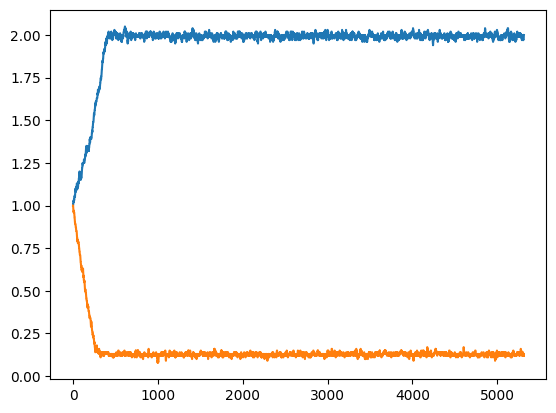

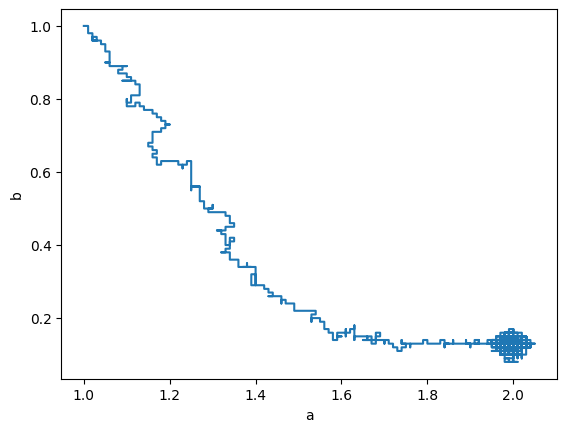

In [16]:
initial_pos = np.array([1, 1])
no_steps = 10000

def MCMC_2D(xdata, ydata, yerr, model_func, initial_pos, no_steps=10000, burn_in_step_size = 0.01, post_burn_in_step_size = 0.01, burn_in = 1000):
    #calculates chisq value of initial position and adds it to the chisq list.
    chisq = [np.sum(functions.chisq(initial_pos, model_func, xdata, ydata, yerr))]
    #initiates history array to store each coordinate the random walker passes through in the simulation.
    history = [initial_pos]
    for i in range(0, no_steps):
        #setting step size depending on whether we are during burn in or post burn in.
        if i < burn_in:
            step_size = burn_in_step_size
        else:
            step_size = post_burn_in_step_size
        #initiates random walker object at the initial position
        w = walker(initial_pos, ndim = 2, step_size=step_size)
        #does 1 random step and saves this new position as a variable new_pos.
        pos_test = w.doSteps(1)
        new_pos = pos_test[1]
        #calculates the chisq value of this new position and adds it to the chisq list.
        chisq.append(np.sum(functions.chisq(new_pos, model_func, xdata, ydata, yerr)))
        #if the move reduced the chisq value, accept the move and add the new coordinate to the history
        # and set it as the new initial position for the next random step.
        if chisq[i+1] < chisq[i]:
            history.append(new_pos)
            initial_pos = new_pos
        #otherwise, accept the move with some probability.
        else:
            probability = np.exp(-(chisq[i+1]-chisq[i])/2)
            n = random.random() #produces a random float between 0 and 1.
            if n <= probability:
                history.append(new_pos)
                initial_pos = new_pos
    
    #plot of the 2 parameters against number of steps.
    plt.figure(1)
    plt.plot(history)
    #plot of how the algorithm moves through the 2D parameter space.
    plt.figure(2)
    plt.plot(np.array(history)[:, 0], np.array(history)[:, 1])
    plt.ylabel('b')
    plt.xlabel('a')

    #returns final position
    return (history[-1])

MCMC_2D(xdata, ydata, yerr, func, initial_pos, no_steps = no_steps, burn_in_step_size=0.01)

REAL DATA

[array([0.71899992, 0.28100032]), array([0.54099983, 0.19000022]), array([0.81399953, 0.33000004]), array([0.81099921, 0.34400046]), array([0.7269997 , 0.35500008]), array([0.66400003, 0.2530002 ]), array([0.76699954, 0.30300003]), array([0.65499967, 0.21500021]), array([0.71999955, 0.26800001]), array([0.74899966, 0.30600023]), array([0.62599969, 0.1850002 ]), array([0.72599959, 0.23500021]), array([0.57200015, 0.18800019]), array([0.72599983, 0.21400018]), array([0.59100014, 0.17400019]), array([0.74799979, 0.31700021]), array([0.68599999, 0.25100034]), array([0.78399956, 0.34599984]), array([0.65299982, 0.23500025]), array([0.86399937, 0.36299998]), array([0.66399968, 0.21800025]), array([0.6699996 , 0.24200022]), array([0.74499959, 0.31000006]), array([0.65099996, 0.2250002 ]), array([0.68399978, 0.24900036]), array([0.75999963, 0.32600009]), array([0.79899973, 0.33500022]), array([0.82499987, 0.32300001]), array([0.62599993, 0.16200019]), array([0.58699995, 0.16300017]), array([0.

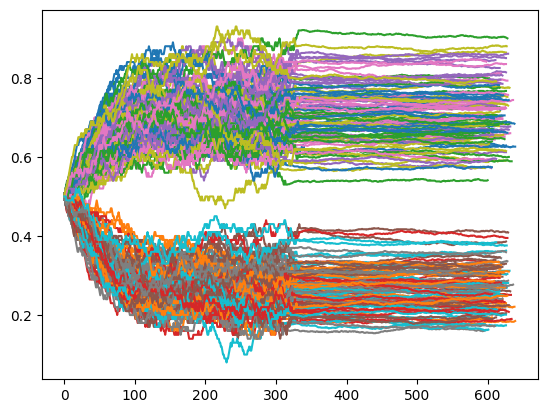

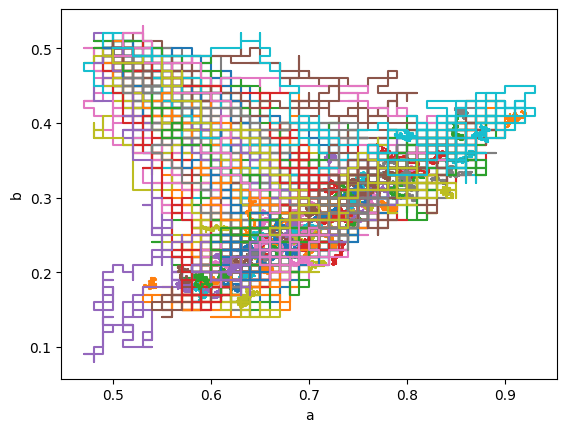

In [19]:
#defining x and y values and the y errors for the simulation.
xval = redshift
yval = distance_modulus
yerr = dm_err

#the model function that we're fitting to the dataset.
def model_funct(xs, omega_lambda0, omega_M0):
    return 5*np.log10((1+xs)*functions.get_transverse_comoving_distance(xs, H_0, omega_lambda0, omega_M0))-5

#start of MCMC chain
initial_pos = np.array([0.5, 0.5])

#runs MCMC
parameters = []
for i in range(0, 100):
    parameters.append(MCMC_2D(xval, yval, yerr, model_funct, initial_pos, no_steps=700, burn_in_step_size=0.01, post_burn_in_step_size=0.001, burn_in=400))
print(parameters)

#calculating the mean and standard deviation of the two parameters
a = np.array(parameters)[:, 0]
b = np.array(parameters)[:, 1]
print(np.mean(a), np.std(a))
print(np.mean(b), np.std(b))

In [20]:
print(a)
print(b)

[0.71899992 0.54099983 0.81399953 0.81099921 0.7269997  0.66400003
 0.76699954 0.65499967 0.71999955 0.74899966 0.62599969 0.72599959
 0.57200015 0.72599983 0.59100014 0.74799979 0.68599999 0.78399956
 0.65299982 0.86399937 0.66399968 0.6699996  0.74499959 0.65099996
 0.68399978 0.75999963 0.79899973 0.82499987 0.62599993 0.58699995
 0.74299985 0.67599976 0.84999967 0.65999973 0.73199987 0.62700003
 0.65399981 0.80599952 0.70199978 0.75199974 0.62900001 0.69599986
 0.74699968 0.83499962 0.57199991 0.574      0.6899997  0.67699999
 0.75699967 0.63299996 0.6839999  0.58900005 0.66899985 0.79300004
 0.77499968 0.7559998  0.68499964 0.86099952 0.64399981 0.74299973
 0.66899985 0.89999986 0.7299999  0.72299963 0.73000002 0.67799962
 0.70399988 0.84499985 0.69799972 0.65599978 0.70499998 0.77499968
 0.61199999 0.69599974 0.67799985 0.78199983 0.60000002 0.65599978
 0.74399984 0.71499938 0.74399996 0.66099972 0.79599965 0.74099976
 0.61599982 0.75099999 0.64499992 0.80799961 0.59500009 0.8799

In [196]:
print(np.sum(functions.chisq([0.5, 0.5], model_funct, xval, yval, yerr)))
print(np.sum(functions.chisq([0.5001, 0.5000], model_funct, xval, yval, yerr)))

783.2563878419572
783.1786930691351


In [199]:
print(np.exp(-10*(783.355870229238-783.2563878419572)))

0.3697885686311564


PRE EXISTING LIBRARY

In [7]:
import pymc3 as pm
plt.rc('font', size=12)

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\bradl\AppData\Local\Temp\ipykernel_28084\1108726939.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [8]:
# 2. model that data with a simple regression model
with pm.Model() as exercise2:

    stdev = pm.HalfNormal('stdev', sd=1.)
    omega_lambda0 = pm.Uniform('omega_lambda0', lower=0, upper=1.)
    omega_M0 = pm.Uniform('omega_M0', lower=0, upper=1.)
    print(omega_lambda0)
    expected_value = 5*np.log10((1+redshift)*functions.get_transverse_comoving_distance(redshift, H_0, omega_lambda0.value(), omega_M0.value()))-5
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=distance_modulus)

omega_lambda0 ~ Uniform


AttributeError: 'TransformedRV' object has no attribute 'value'

In [9]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

# 1. generate the artificial dataset.
N = 10000

noise = np.random.normal(0.0, 0.1, N)
X = np.random.normal(1.0, 0.1, N)
obs_y = (0.65 * X) + 0.5 + noise

# 2. model that data with a simple regression model
with pm.Model() as exercise2:

    stdev = pm.HalfNormal('stdev', sd=1.)
    intercept = pm.Normal('intercept', mu=0.0, sd=1.)
    coeff = pm.Normal('beta', mu=0.5, sd=1.)

    expected_value = (X * coeff) + intercept
    y = pm.Normal('y', mu=expected_value, sd=stdev, observed=obs_y)

with exercise2:
    trace = pm.sample(1000, step=pm.Metropolis())

pm.traceplot(trace, ['intercept', 'beta', 'stdev'])



C:\Users\bradl\AppData\Local\Temp\ipykernel_28084\226686289.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
c:\Program Files\Python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [intercept]
>Metropolis: [stdev]


ValueError: Not enough samples to build a trace.